In [36]:
#Author: Leila Abdelrahman 
#Adapted from the Classify Images of Clothing Website by Fran√ßois Chollet, 2017, MIT

from __future__ import absolute_import, division, print_function, unicode_literals
# -*- coding: utf-8 -*-




#Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)






1.15.0


In [88]:
#Import the Fashio MNIST dataset 

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#Loading the dataset should return 4 NumPy arrays

#Next, add class name labels, as these are not included with the datast. Stoer them in an
#array for later as we plot the images
class_names =  ['T-shirt/top', 'Trouser', 'Pullover' , 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 
               'Ankle boot']

In [87]:
#Look at the parameters of the dataset

#The data set contains 60,000 images in the training set, each represented as 28*28 poxels
print(train_images.shape)





(60000, 28, 28)


In [13]:
#There are 60,000 traning labels 
len(train_labels)

60000

In [14]:
#Each label has an integer between 0 and 9;
print(train_labels)

#Label	Class
#0	T-shirt/top
#1	Trouser
#2	Pullover
#3	Dress
#4	Coat
#5	Sandal
#6	Shirt
#7	Sneaker
#8	Bag
#9	Ankle boot


[9 0 0 ... 3 0 5]


In [15]:
#Thee are 10,000 images in the test set, each 28*28 pixels
print(test_images.shape)

(10000, 28, 28)


In [17]:
#The test set contains 10,000 image labels 
print(len(test_labels))

10000


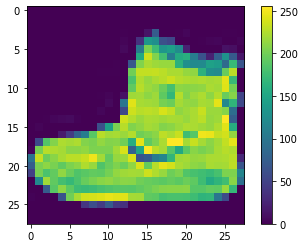

In [19]:
#Preprocess the data so that we can normalize the pixel values between a range of 0 and 1. 
#Normalization helps with training accuracy 
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [20]:
#We now want to scale the values. Do this by dividing by 255, hwhich is the largest pixel value 

train_images = train_images/255.0
test_images = test_images/255.0


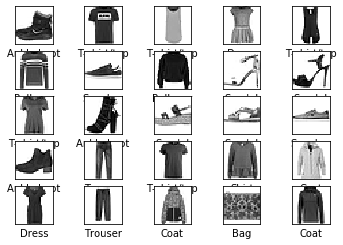

In [34]:
#Verify that the data is in the correct format and that it is standardized 

for i in range (25):
    plt.rcParams.update({'font.size': 10})
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [84]:
#Build the model. Every neural network is composed of layers. Each layer repreents extracting  representations
#from the data fed into them. 
#This neural network has 3 layers. 

#The first layer (Flatten), transforms the image data from a 2d array to a 1d array

#The second layer is a Dense function (a densly connected neural layer, which as 128 nodes, or neurons) 

#The last layer has 10 nodes, and uses the softmax activation function. Softmax activation functions 
#return probability scores  tht sum to 1. MAKE SURE THE NUMBER OF NODES IN THE LAST LAYER IS EQUAL TO 
#THE NUMBER OF CLASSES. 

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)) ,
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])



In [85]:
#Let's look at the anatomy of the model. THis outlines what each layer is.  and how many parameters (arguments) there are. 

print(model.summary())



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [86]:
#Now let's look at the weight array, as well as the biases

#A weight is used to ascribe importance to each node. The higher the node, the more 'imporant' it is in the network 

#A bias is like the intercept added to a linear equation. It adds and additional parameter. The default is that the bias is 0. 


#For the weights and biases, you will see the weights and biases for the first layer and the last layer of the network 

#Weights are normalized from -1 to 1. 

print(model.get_weights())


[array([[ 0.05915671,  0.05859285, -0.02541059, ..., -0.04632689,
        -0.02528049, -0.07775083],
       [-0.02254455, -0.0296834 , -0.02465769, ...,  0.06230139,
        -0.05743643,  0.07407277],
       [-0.01078741,  0.00488673,  0.01011985, ..., -0.03585644,
         0.07628766,  0.02910393],
       ...,
       [-0.01544712,  0.00676015,  0.02059107, ...,  0.02152188,
         0.03263777,  0.03763761],
       [-0.01113994, -0.07543546,  0.05419255, ..., -0.0113381 ,
        -0.07885186, -0.06021833],
       [-0.05588523, -0.02990438,  0.04380618, ..., -0.01646842,
        -0.07246359, -0.0736271 ]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [80]:
#Complile the model with optimizer, loss, and metrics 

#Loss function: steers the model in the right direction. Loss is calculated by how accurate the model is at classifying
#Optimizer: the model uses an optimization funcition to minizmize the loss function
#Metrics: Records accuracy of how well the model correctly classifies the images

model.compile(optimizer = 'adam' , 
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy'])

In [81]:
#Train the model

#Step 1: feed the training data to the model. In this case it is the train_images and train_labels arrays
#Step 2: Model learns over a series of epochs. Each epoch represents one "step" in the learning process
#Step 3" Ask the model to make predictions about the test set. 


model.fit(train_images, train_labels, epochs = 10)

#This model is about 85% accurate on the training data. Increasing the number of epochs increases accuracy,
#but increases computing time.

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 111us/sample - loss: 4.4009 - acc: 0.3902
Epoch 2/10
60000/60000 [==============================] - 7s 109us/sample - loss: 1.7678 - acc: 0.3156
Epoch 3/10
60000/60000 [==============================] - 7s 108us/sample - loss: 2.3916 - acc: 0.1006
Epoch 4/10
60000/60000 [==============================] - 7s 109us/sample - loss: 2.3029 - acc: 0.0976
Epoch 5/10
60000/60000 [==============================] - 7s 109us/sample - loss: 2.3026 - acc: 0.0996
Epoch 6/10
60000/60000 [==============================] - 7s 109us/sample - loss: 2.3026 - acc: 0.0986
Epoch 7/10
60000/60000 [==============================] - 7s 109us/sample - loss: 3.5755 - acc: 0.0979
Epoch 8/10
60000/60000 [==============================] - 6s 108us/sample - loss: 2.3027 - acc: 0.0993
Epoch 9/10
60000/60000 [==============================] - 7s 109us/sample - loss: 2.3028 - acc: 0.0988
Epoch 10/10
60000/60000 [=========================

In [ ]:
#Now test the model on the test set and evaluate accuracy 

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest accuracy:', test_acc)

#You will notice that the test accuracy is less than the training accuracy. This difference represents overfitting. 

In [48]:
#Lets look at how the model thinks by making predictions 
#The ten numbers represent probabilties of the image beloning to a certain class
#Each number represents the model's 'confidence that an image belongs to that class'


predictions = model.predict(test_images)

print(predictions[0])

#Print the label with the highest confidence value 
print('Highest Confidence Label:', np.argmax(predictions[0]))

#Compare this with the model's actual test label 
print('Test Label:', test_labels[0])

[1.3230255e-22 6.1009794e-26 0.0000000e+00 8.5425549e-37 0.0000000e+00
 1.5749400e-02 6.5756620e-38 9.1355972e-02 1.0976517e-10 8.9289469e-01]
Highest Confidence Label: 9
Test Label: 9


In [61]:
#Let's graph the confidence levels as function of class label 

def plot_image(i , predictions_array, true_label, img) : 
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label: 
        color = 'blue'
    else : 
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
    
def plot_value_array(i, predictions_array, true_label) :
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array , color = "#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
        
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
        

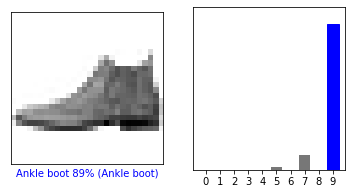

In [62]:
#Look at the first image, predictions and predictions array 

i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i , predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i] , test_labels)
plt.show()


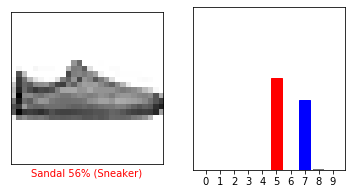

In [63]:
#Now lets look at the 12 image 

i = 12 
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i , predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i] , test_labels)
plt.show()


In [ ]:
#Now let's plot several images with their predictions 
#Correct predictions are in blue. Incorrect predictions are in red.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images) :
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
